In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'D:\Devi\ICT_TVM\ASSIGNMENTS\Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Explain the dataset

In [7]:
data.shape

(200, 5)

In [8]:
data.size


1000

In [4]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [6]:
del data['Unnamed: 0'] 

In [7]:
data.head(3)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [52]:
tv_m=data['TV'].mean()

radio_m=data['Radio'].mean()
news_m=data['Newspaper'].mean()
mean_ad={'tv_m':[tv_m],'radio_m':[radio_m],'news_m':[news_m]}
region_std=list(mean_ad.keys())
values_std=list(mean_ad.values())
DF=pd.DataFrame(mean_ad)
DF

,tv_m,radio_m,news_m
0,147.0425,23.264,30.554


<AxesSubplot:xlabel='Sales'>

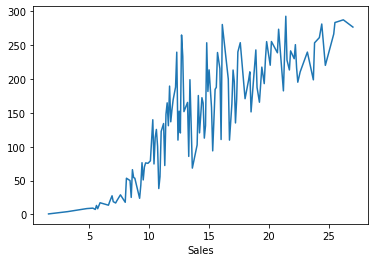

In [8]:
data.groupby(by=['Sales'])['TV'].mean().plot(kind='line')

<AxesSubplot:xlabel='Sales'>

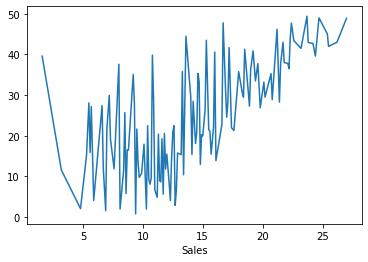

In [9]:
data.groupby(by=['Sales'])['Radio'].mean().plot(kind='line')

<AxesSubplot:xlabel='Sales'>

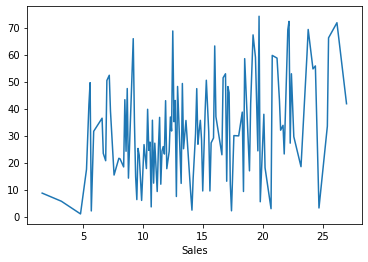

In [10]:
data.groupby(by=['Sales'])['Newspaper'].mean().plot(kind='line')

C:\Users\Akhil\AppData\Local\Temp\ipykernel_11420\1635676254.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by=['Sales'])['TV','Radio','Newspaper'].mean().plot(kind='line')


<AxesSubplot:xlabel='Sales'>

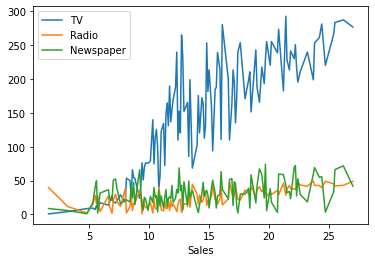

In [82]:

data.groupby(by=['Sales'])['TV','Radio','Newspaper'].mean().plot(kind='line')

The given data is about the advertisement in 3 medium and and the respective sales,From the graph it is clearly visible that the Tv adds makes more sales than the other two


## 2.Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [84]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

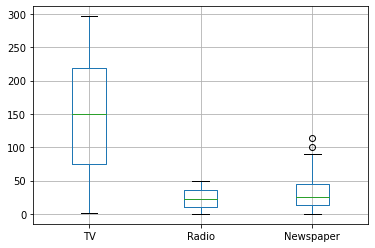

In [13]:
data[['TV','Radio','Newspaper']].boxplot()

Tv add data shows high deviations from the other two mediums of advertisement.

## 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>, <AxesSubplot:>]],
      dtype=object)

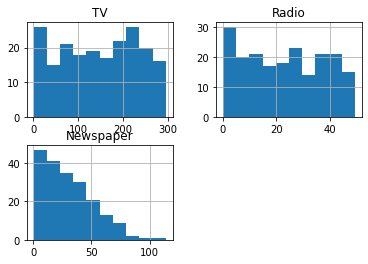

In [14]:
data[['TV','Radio','Newspaper']].hist()

Three of there variables are independant on each other so that we can go for ANOVA test for the analysis.

Setting Hypothesis


H0: Same amount were spent for the three advertisements

H1: Different amount were spent for three advertisements

In [93]:
from scipy.stats import f_oneway
from scipy import stats

In [94]:
F, p = stats.f_oneway(data['TV'], data['Radio'],data['Newspaper'])

In [95]:
alpha=.05
print("p value :", p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.")

p value : 4.552931539744962e-103
Reject H0


From the test the pvalue is verymuch less than the alpha value, so that we can reject H0 and accept the alternative hypothesis, ie Different amount were spent for there three typesw of advertisement